Choose a dataset that has at least 1000 greyscale images and divide them into train and test.

Optimize the architecture of your autoencoder and tune it to get a fine performance.

show three cases; the original images, the latent form "the represntation outputted from the hidden layer, google how to get the output of an intermediate layer in keras", and the reconstructed one.

In [ ]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.backend import function
import matplotlib.pyplot as plt
from skimage.transform import resize


In [ ]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


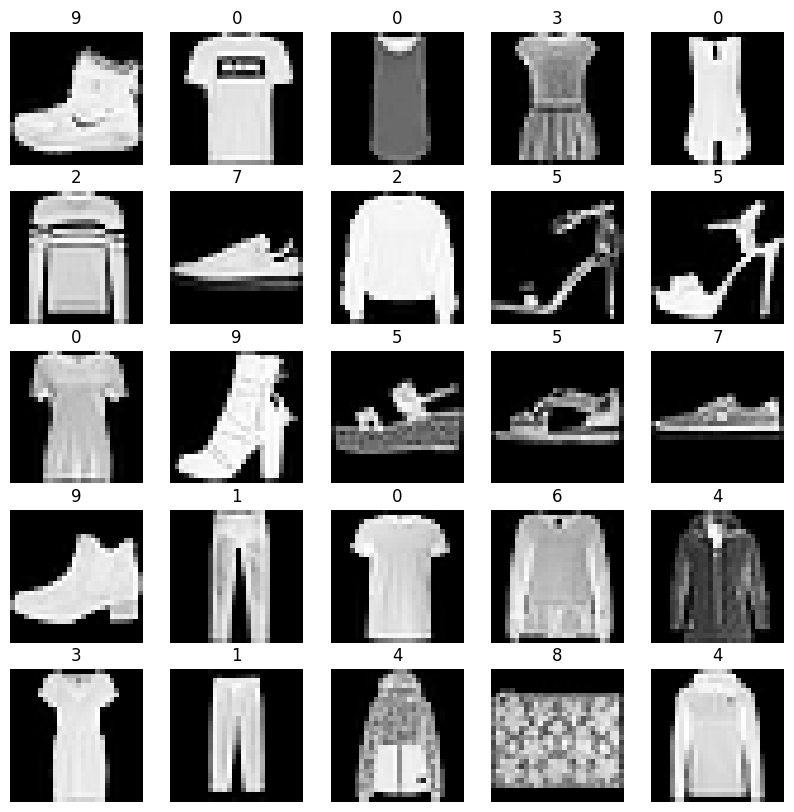

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='Greys_r')
    plt.title(train_labels[i])
    plt.axis('off')

plt.show()

In [ ]:
assert train_images.shape == (60000, 28, 28)
assert test_images.shape == (10000, 28, 28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

In [ ]:
train_images = train_images.astype('float32') / 255
train_images = train_images.reshape((-1,28*28))

test_images = test_images.astype('float32') / 255
test_images = test_images.reshape((-1,28*28))

In [ ]:
# summarize the shape of the dataset
print('Train', train_images.shape, train_labels.shape)
print('Test', test_images.shape, test_labels.shape)

Train (60000, 784) (60000,)
Test (10000, 784) (10000,)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

encoding_dim = 64   # dimension of the latent representation
image_size = train_images.shape[1]

# Create input layer. This returns a tensor
inputs = layers.Input(shape=(image_size,), name = 'input_image')

# Create hidden layer
encoded = layers.Dense(encoding_dim,
                       activation='relu',
                       name = 'encoded')(inputs)
                       ## The output of this layer represents the encoding vector

# Create output layer
output_image = layers.Dense(image_size, # Why?
                            activation='sigmoid',
                            name = 'reconstructed')(encoded)

# Create model
model = Model(inputs=inputs, outputs=output_image)


In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 784)]             0         
                                                                 
 encoded (Dense)             (None, 64)                50240     
                                                                 
 reconstructed (Dense)       (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

model.fit(train_images,
          train_images, # train_images are both the inputs and the labels
          epochs=10,
          batch_size=64,
          validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0333 - val_loss: 0.0184
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0152 - val_loss: 0.0133
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0122 - val_loss: 0.0114
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0109 - val_loss: 0.0105
Epoch 5/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0102 - val_loss: 0.0100
Epoch 6/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0097 - val_loss: 0.0097
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 8/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 9/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 10/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0091 - val_loss: 0.0092

In [ ]:
in_imgs = test_images[:10]
#in_imgs = np.reshape(in_imgs, (in_imgs.shape[0], -1))

In [ ]:
Output= function(model.layers[0].input, model.layers[1].output)
output_images = Output(in_imgs)

for i,x in enumerate(output_images):
  output_images[i]=(x-x.min())/(x.max()-x.min())
output_images=output_images.reshape((-1,8,8))

output_images

array([[[0.20873548, 0.15365732, 0.5635396 , 0.33998188, 0.3198512 ,
         0.35076633, 0.20277059, 0.22267607],
        [0.1515748 , 0.20577951, 0.37272948, 0.30136412, 0.53405285,
         0.3982151 , 0.41746768, 0.        ],
        [0.38191822, 0.11280129, 0.12251066, 0.14635722, 0.1350271 ,
         0.33673015, 0.29714054, 0.3100595 ],
        [0.30149177, 0.45669293, 0.2797156 , 0.19733585, 0.28142166,
         0.10048601, 0.24383157, 0.06617233],
        [0.339044  , 0.282812  , 0.23128638, 0.22715218, 0.23050347,
         0.3421572 , 0.3815885 , 0.05506621],
        [0.28048176, 0.37179384, 0.2542765 , 0.29023218, 0.03868776,
         0.11370041, 0.18960875, 0.3573972 ],
        [0.23103884, 0.47875226, 0.08724473, 0.28716886, 0.47992697,
         0.23664711, 1.        , 0.12715712],
        [0.11226586, 0.58174074, 0.05358084, 0.1187868 , 0.        ,
         0.2218822 , 0.41624475, 0.06992368]],

       [[0.10046404, 0.35346735, 0.04862613, 0.20153704, 0.5582316 ,
         

1/1 [==============================] - 0s 60ms/step


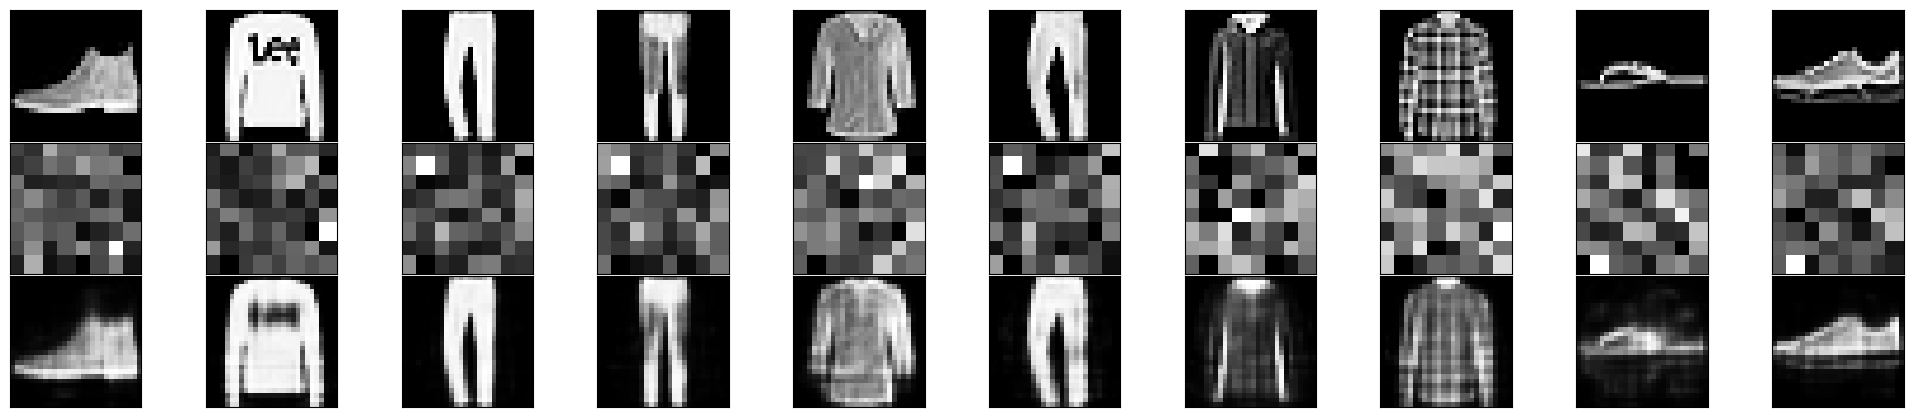

In [ ]:
fig, axes = plt.subplots(nrows=3,
                         ncols=10,
                         sharex=True,
                         sharey=True,
                         figsize=(20,4))


reconstructed = model.predict(in_imgs).reshape((-1,28,28))
in_imgs = in_imgs.reshape((-1,28,28))

# Loop over rows of plot
for images, row in zip([in_imgs, output_images ,reconstructed], axes):
    # Loop over images in each row
    for img, ax in zip(images, row):
      img = resize(img, (28, 28), order=0, anti_aliasing=False)
      ax.imshow(img, cmap='Greys_r')
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)